**Learning Sparse Codes with Entropy-Based ELBOs**

*Dmytro Velychko, Simon Damm, Asja Fischer, Jörg Lücke*

Learning sparse basis for natural image patches.

Author: Dmytro Velychko, Carl von Ossietzky University of Oldenburg

Email: dmytro.velychko@uni-oldenburg.de

In [1]:

import os
from datetime import datetime
import random
import math
import numpy as np
import torch
from datasets.bars import BarsDataset
from datasets.images import OlshausenDataset
from datasets.utils import to_bases, to_images
from models.optimalmanifoldELBO import *
from models.stochasticELBO import StochasticSC, LinearGaussianModel
from models.analyticELBO import AnalyticELBOSC
from utils.training import train_Adam, train_LBFGS
from utils.training import optimize_latents, adjust_parameters
from utils.training import CallbackList
import utils.plotting as plu
from utils.statistics import posterior_sparseness

import matplotlib.pyplot as plt
import utils.trochjson as tj
from tqdm import tqdm
%matplotlib inline

torch.set_default_dtype(torch.float32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
#device = "cpu"

# Uncomment to debug NANs
#torch.autograd.set_detect_anomaly(True)


if False:
    seed = 123456
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)


### Load a dataset
dataset = OlshausenDataset(N=200*1024)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4*128)
N = dataset.N
D = dataset.D
H = 10**2  # number of sources

if dataloader.batch_size < H:
    print("Warning: dataloader.batch_size < H")

### Construct a model

likelihood_entropies = []
prior_entropies = []
proposal_entropies = []
def on_compute_entropy(likelihood_entropy, prior_entropy, proposal_entropy):
    likelihood_entropies.append(likelihood_entropy.item())
    prior_entropies.append(prior_entropy.item())
    proposal_entropies.append(proposal_entropy.item())

modeltype = 1
if modeltype == 1:
    model = OptimalManifoldSC(N, D, H, 
        variationalparams=DiagCovarGaussianVariationalParams(N, D, H), 
        #variationalparams=AmortizedResNetVariationalParams(N, D, H), 
        on_compute_entropy=on_compute_entropy, constrain_W=True).to(device)
elif modeltype == 2:
    model = AnalyticELBOSC(N, D, H, 
            variationalparams=AmortizedGaussianVariationalParams(N, D, H)).to(device)
elif modeltype == 3:
    model = StochasticSC(N, D, H, 
            variationalparams=AmortizedDiagCovarGaussianVariationalParams(N, D, H), nsamples=10).to(device)
elif modeltype == 4:
    model = LinearGaussianModel(N, D, H, 
            variationalparams=AmortizedDiagCovarGaussianVariationalParams(N, D, H), nsamples=1).to(device)

### Prepare the output directory
path = "./out/images/" + model.__class__.__name__ + "/" + datetime.now().strftime('%y.%m.%d-%H:%M:%S') + "/"
if not os.path.exists(path):
    os.makedirs(path)
prefix = path

### Plotting routines
test_x = []
test_indexes = []
for patch, index in dataset:
    test_x.append(patch)
    test_indexes.append(index)
    if index > 1000:
        break
test_x = torch.tensor(np.stack(test_x, axis=0))
test_indexes = torch.tensor(test_indexes)



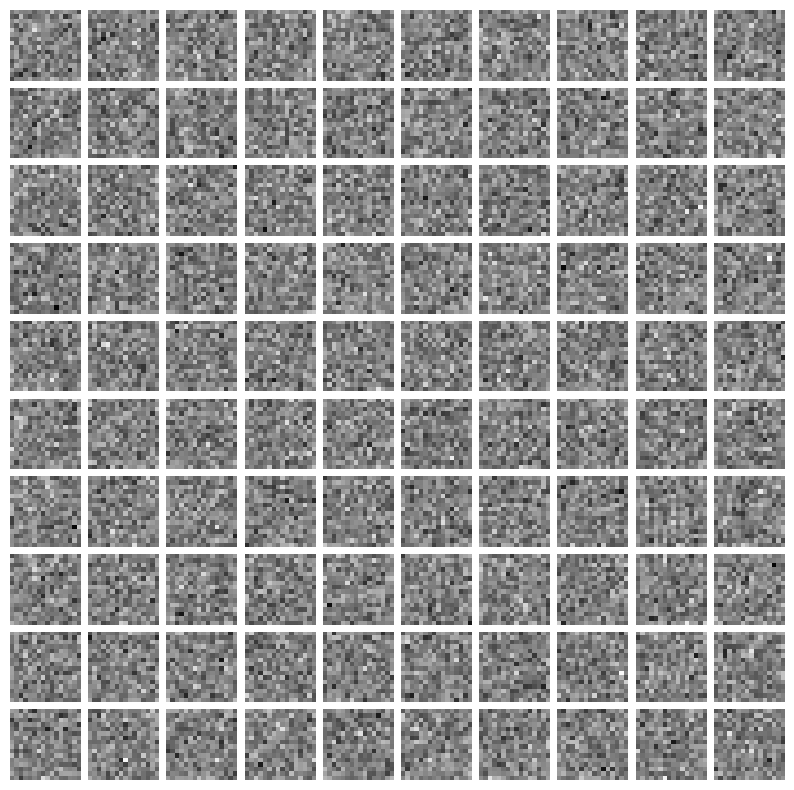

Optimizing ELBO
Epoch    1 	 Batch    0 	 Scale: 10.00 	 ELBO: 1919.541870
Epoch    1 	 Batch    1 	 Scale: 10.00 	 ELBO: 2084.251953
Epoch    1 	 Batch    2 	 Scale: 10.00 	 ELBO: 2224.255615
Epoch    1 	 Batch    3 	 Scale: 10.00 	 ELBO: 1706.296143
Epoch    1 	 Batch    4 	 Scale: 10.00 	 ELBO: 1923.655884
Epoch    1 	 Batch    5 	 Scale: 10.00 	 ELBO: 1489.487915
Epoch    1 	 Batch    6 	 Scale: 10.00 	 ELBO: 1482.407227
Epoch    1 	 Batch    7 	 Scale: 10.00 	 ELBO: 1946.445190
Epoch    1 	 Batch    8 	 Scale: 10.00 	 ELBO: 1726.755615
Epoch    1 	 Batch    9 	 Scale: 10.00 	 ELBO: 1489.436035
Epoch    1 	 Batch   10 	 Scale: 10.00 	 ELBO: 1557.041992
Epoch    1 	 Batch   11 	 Scale: 10.00 	 ELBO: 1321.532227
Epoch    1 	 Batch   12 	 Scale: 10.00 	 ELBO: 1537.045654
Epoch    1 	 Batch   13 	 Scale: 10.00 	 ELBO: 1730.554199
Epoch    1 	 Batch   14 	 Scale: 10.00 	 ELBO: 1646.062256
Epoch    1 	 Batch   15 	 Scale: 10.00 	 ELBO: 1901.391968
Epoch    1 	 Batch   16 	 Scale: 10.00 	

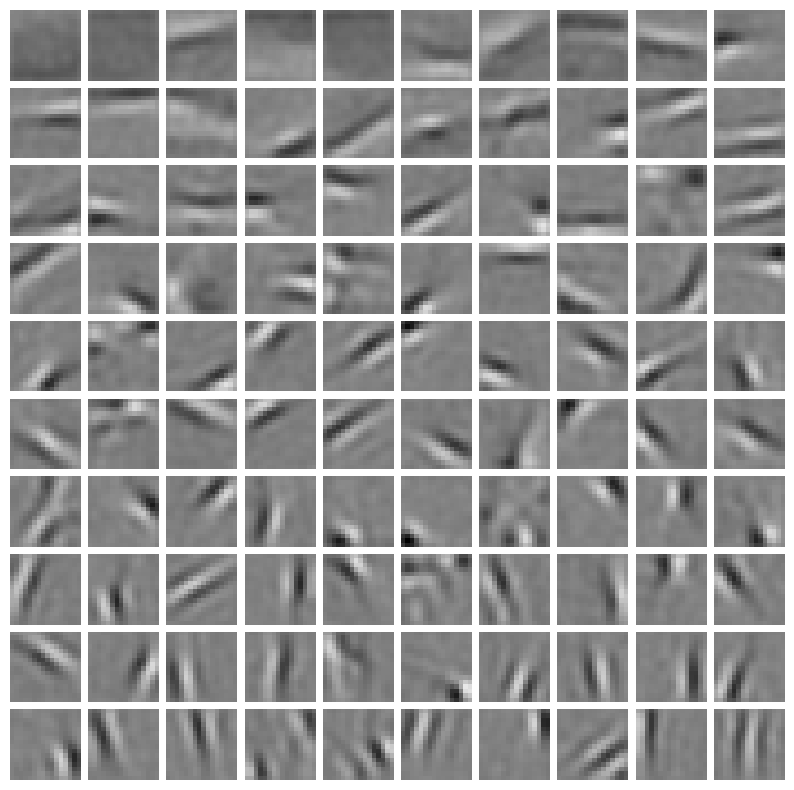

Computing epoch ELBO


400it [02:28,  2.70it/s]


Optimizing ELBO
Epoch    2 	 Batch    0 	 Scale: 8.00 	 ELBO: 880.328003
Epoch    2 	 Batch    1 	 Scale: 8.00 	 ELBO: 1104.226562
Epoch    2 	 Batch    2 	 Scale: 8.00 	 ELBO: 1089.760254
Epoch    2 	 Batch    3 	 Scale: 8.00 	 ELBO: 911.267151
Epoch    2 	 Batch    4 	 Scale: 8.00 	 ELBO: 963.920837
Epoch    2 	 Batch    5 	 Scale: 8.00 	 ELBO: 893.781372
Epoch    2 	 Batch    6 	 Scale: 8.00 	 ELBO: 1057.853027
Epoch    2 	 Batch    7 	 Scale: 8.00 	 ELBO: 799.098572
Epoch    2 	 Batch    8 	 Scale: 8.00 	 ELBO: 876.643921
Epoch    2 	 Batch    9 	 Scale: 8.00 	 ELBO: 994.324585
Epoch    2 	 Batch   10 	 Scale: 8.00 	 ELBO: 873.753723
Epoch    2 	 Batch   11 	 Scale: 8.00 	 ELBO: 978.001099
Epoch    2 	 Batch   12 	 Scale: 8.00 	 ELBO: 944.266785
Epoch    2 	 Batch   13 	 Scale: 8.00 	 ELBO: 909.040771
Epoch    2 	 Batch   14 	 Scale: 8.00 	 ELBO: 978.306030
Epoch    2 	 Batch   15 	 Scale: 8.00 	 ELBO: 920.027710
Epoch    2 	 Batch   16 	 Scale: 8.00 	 ELBO: 1211.042236
Epoch    2 

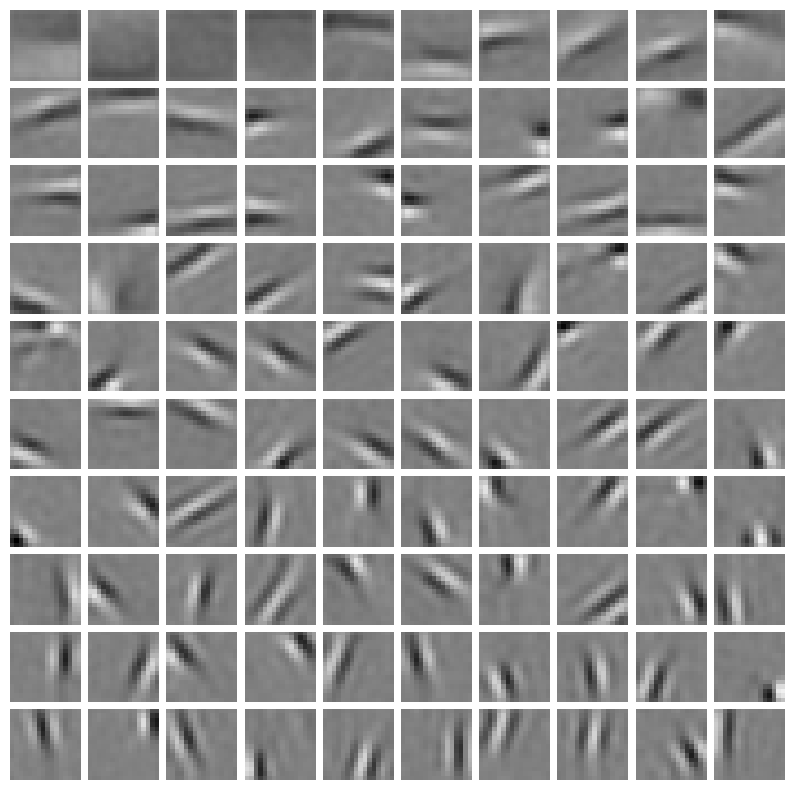

Computing epoch ELBO


400it [02:27,  2.72it/s]


Optimizing ELBO
Epoch    3 	 Batch    0 	 Scale: 6.00 	 ELBO: 472.592773
Epoch    3 	 Batch    1 	 Scale: 6.00 	 ELBO: 535.694702
Epoch    3 	 Batch    2 	 Scale: 6.00 	 ELBO: 631.995728
Epoch    3 	 Batch    3 	 Scale: 6.00 	 ELBO: 617.816162
Epoch    3 	 Batch    4 	 Scale: 6.00 	 ELBO: 720.828064
Epoch    3 	 Batch    5 	 Scale: 6.00 	 ELBO: 562.345215
Epoch    3 	 Batch    6 	 Scale: 6.00 	 ELBO: 622.572021
Epoch    3 	 Batch    7 	 Scale: 6.00 	 ELBO: 542.246094
Epoch    3 	 Batch    8 	 Scale: 6.00 	 ELBO: 601.471680
Epoch    3 	 Batch    9 	 Scale: 6.00 	 ELBO: 617.870239
Epoch    3 	 Batch   10 	 Scale: 6.00 	 ELBO: 407.123596
Epoch    3 	 Batch   11 	 Scale: 6.00 	 ELBO: 521.203369
Epoch    3 	 Batch   12 	 Scale: 6.00 	 ELBO: 681.982117
Epoch    3 	 Batch   13 	 Scale: 6.00 	 ELBO: 547.705322
Epoch    3 	 Batch   14 	 Scale: 6.00 	 ELBO: 480.795319
Epoch    3 	 Batch   15 	 Scale: 6.00 	 ELBO: 669.263733
Epoch    3 	 Batch   16 	 Scale: 6.00 	 ELBO: 659.714600
Epoch    3 	 Ba

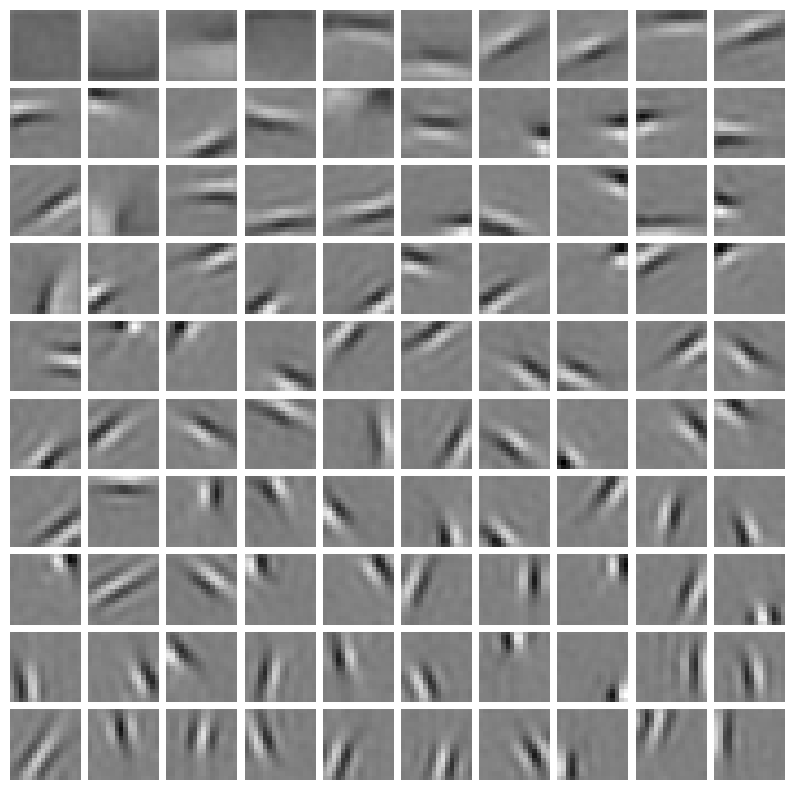

Computing epoch ELBO


400it [02:29,  2.67it/s]


Optimizing ELBO
Epoch    4 	 Batch    0 	 Scale: 4.00 	 ELBO: 179.852417
Epoch    4 	 Batch    1 	 Scale: 4.00 	 ELBO: 232.465073
Epoch    4 	 Batch    2 	 Scale: 4.00 	 ELBO: 254.745819
Epoch    4 	 Batch    3 	 Scale: 4.00 	 ELBO: 218.311554
Epoch    4 	 Batch    4 	 Scale: 4.00 	 ELBO: 329.644806
Epoch    4 	 Batch    5 	 Scale: 4.00 	 ELBO: 200.089264
Epoch    4 	 Batch    6 	 Scale: 4.00 	 ELBO: 228.675873
Epoch    4 	 Batch    7 	 Scale: 4.00 	 ELBO: 254.701935
Epoch    4 	 Batch    8 	 Scale: 4.00 	 ELBO: 179.082977
Epoch    4 	 Batch    9 	 Scale: 4.00 	 ELBO: 257.169037
Epoch    4 	 Batch   10 	 Scale: 4.00 	 ELBO: 313.992981
Epoch    4 	 Batch   11 	 Scale: 4.00 	 ELBO: 300.626221
Epoch    4 	 Batch   12 	 Scale: 4.00 	 ELBO: 340.114685
Epoch    4 	 Batch   13 	 Scale: 4.00 	 ELBO: 221.876724
Epoch    4 	 Batch   14 	 Scale: 4.00 	 ELBO: 254.735718
Epoch    4 	 Batch   15 	 Scale: 4.00 	 ELBO: 240.834503
Epoch    4 	 Batch   16 	 Scale: 4.00 	 ELBO: 198.837616
Epoch    4 	 Ba

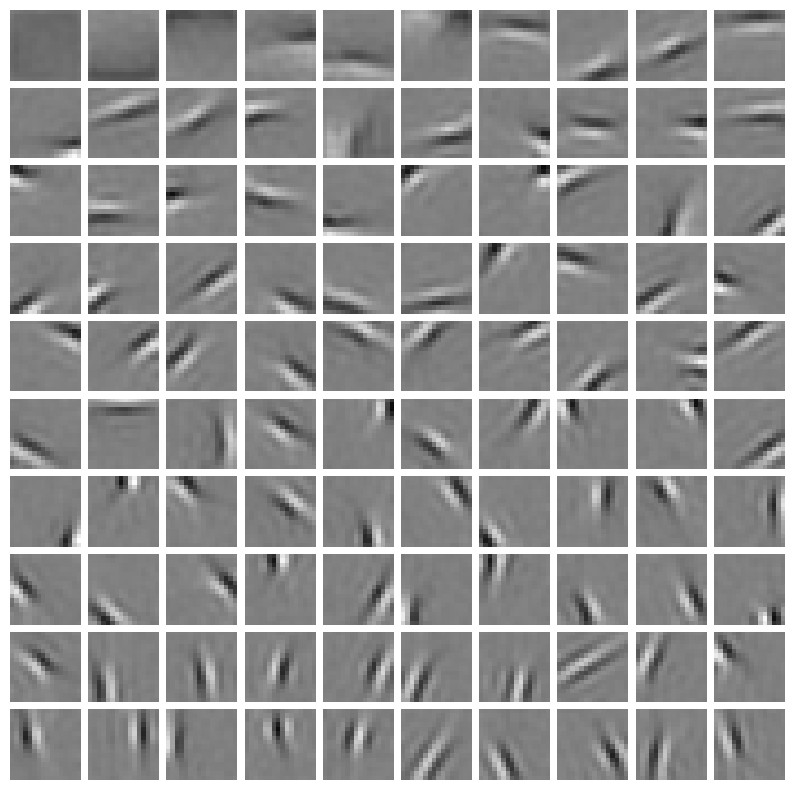

Computing epoch ELBO


400it [02:33,  2.61it/s]


Optimizing ELBO
Epoch    5 	 Batch    0 	 Scale: 2.00 	 ELBO: 79.556122
Epoch    5 	 Batch    1 	 Scale: 2.00 	 ELBO: 80.548386
Epoch    5 	 Batch    2 	 Scale: 2.00 	 ELBO: 96.893250
Epoch    5 	 Batch    3 	 Scale: 2.00 	 ELBO: 87.301544
Epoch    5 	 Batch    4 	 Scale: 2.00 	 ELBO: 80.374588
Epoch    5 	 Batch    5 	 Scale: 2.00 	 ELBO: 72.183670
Epoch    5 	 Batch    6 	 Scale: 2.00 	 ELBO: 69.601654
Epoch    5 	 Batch    7 	 Scale: 2.00 	 ELBO: 73.054184
Epoch    5 	 Batch    8 	 Scale: 2.00 	 ELBO: 68.764450
Epoch    5 	 Batch    9 	 Scale: 2.00 	 ELBO: 75.532303
Epoch    5 	 Batch   10 	 Scale: 2.00 	 ELBO: 65.748428
Epoch    5 	 Batch   11 	 Scale: 2.00 	 ELBO: 58.597946
Epoch    5 	 Batch   12 	 Scale: 2.00 	 ELBO: 71.822205
Epoch    5 	 Batch   13 	 Scale: 2.00 	 ELBO: 74.364426
Epoch    5 	 Batch   14 	 Scale: 2.00 	 ELBO: 57.551086
Epoch    5 	 Batch   15 	 Scale: 2.00 	 ELBO: 82.559998
Epoch    5 	 Batch   16 	 Scale: 2.00 	 ELBO: 87.433868
Epoch    5 	 Batch   17 	 Scale:

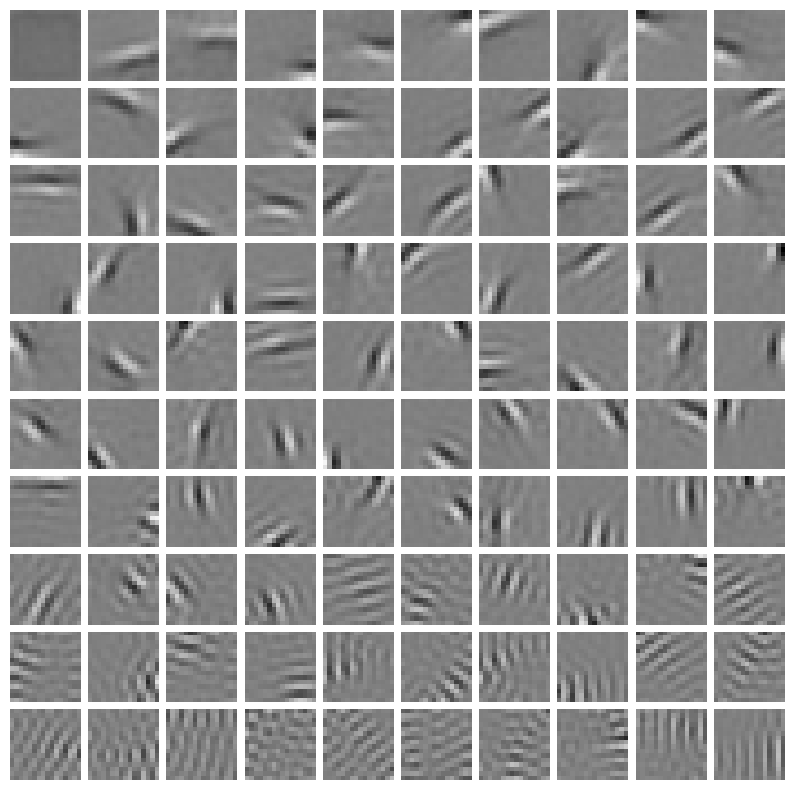

Computing epoch ELBO


400it [02:46,  2.41it/s]


Optimizing ELBO
Epoch    6 	 Batch    0 	 Scale: 1.00 	 ELBO: 104.598877
Epoch    6 	 Batch    1 	 Scale: 1.00 	 ELBO: 102.927551
Epoch    6 	 Batch    2 	 Scale: 1.00 	 ELBO: 112.244476
Epoch    6 	 Batch    3 	 Scale: 1.00 	 ELBO: 106.869720
Epoch    6 	 Batch    4 	 Scale: 1.00 	 ELBO: 101.924805
Epoch    6 	 Batch    5 	 Scale: 1.00 	 ELBO: 103.865829
Epoch    6 	 Batch    6 	 Scale: 1.00 	 ELBO: 92.958717
Epoch    6 	 Batch    7 	 Scale: 1.00 	 ELBO: 102.992355
Epoch    6 	 Batch    8 	 Scale: 1.00 	 ELBO: 99.707443
Epoch    6 	 Batch    9 	 Scale: 1.00 	 ELBO: 103.104752
Epoch    6 	 Batch   10 	 Scale: 1.00 	 ELBO: 98.499084
Epoch    6 	 Batch   11 	 Scale: 1.00 	 ELBO: 95.962845
Epoch    6 	 Batch   12 	 Scale: 1.00 	 ELBO: 102.013252
Epoch    6 	 Batch   13 	 Scale: 1.00 	 ELBO: 101.198105
Epoch    6 	 Batch   14 	 Scale: 1.00 	 ELBO: 92.027893
Epoch    6 	 Batch   15 	 Scale: 1.00 	 ELBO: 106.891678
Epoch    6 	 Batch   16 	 Scale: 1.00 	 ELBO: 112.658203
Epoch    6 	 Batch  

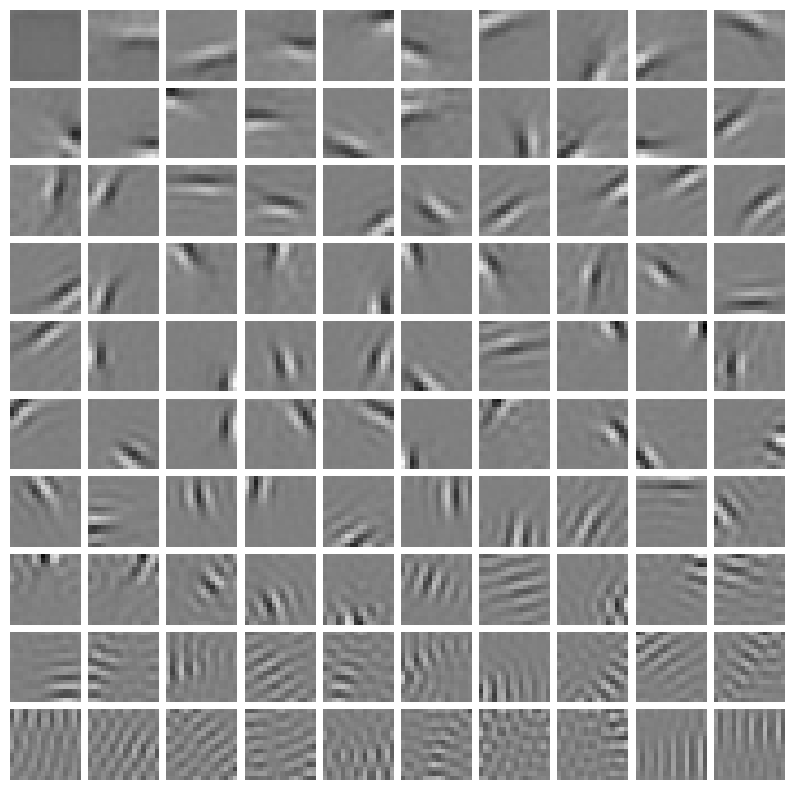

Computing epoch ELBO


400it [00:20, 19.62it/s]


Optimizing ELBO
Epoch    7 	 Batch    0 	 Scale: 1.00 	 ELBO: 106.018982
Epoch    7 	 Batch    1 	 Scale: 1.00 	 ELBO: 104.597260
Epoch    7 	 Batch    2 	 Scale: 1.00 	 ELBO: 114.512665
Epoch    7 	 Batch    3 	 Scale: 1.00 	 ELBO: 108.568375
Epoch    7 	 Batch    4 	 Scale: 1.00 	 ELBO: 104.213989
Epoch    7 	 Batch    5 	 Scale: 1.00 	 ELBO: 106.354767
Epoch    7 	 Batch    6 	 Scale: 1.00 	 ELBO: 95.224838
Epoch    7 	 Batch    7 	 Scale: 1.00 	 ELBO: 105.100121
Epoch    7 	 Batch    8 	 Scale: 1.00 	 ELBO: 101.806641
Epoch    7 	 Batch    9 	 Scale: 1.00 	 ELBO: 105.067566
Epoch    7 	 Batch   10 	 Scale: 1.00 	 ELBO: 100.696213
Epoch    7 	 Batch   11 	 Scale: 1.00 	 ELBO: 98.152435
Epoch    7 	 Batch   12 	 Scale: 1.00 	 ELBO: 104.220444
Epoch    7 	 Batch   13 	 Scale: 1.00 	 ELBO: 103.129257
Epoch    7 	 Batch   14 	 Scale: 1.00 	 ELBO: 94.197685
Epoch    7 	 Batch   15 	 Scale: 1.00 	 ELBO: 108.730682
Epoch    7 	 Batch   16 	 Scale: 1.00 	 ELBO: 114.519562
Epoch    7 	 Batch

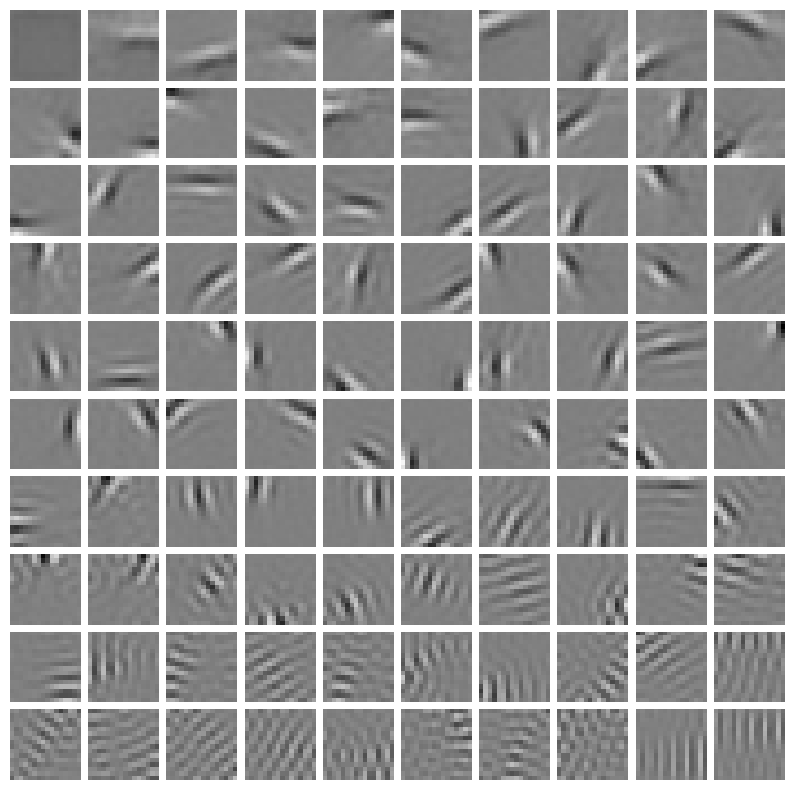

Computing epoch ELBO


400it [00:20, 19.70it/s]


Optimizing ELBO
Epoch    8 	 Batch    0 	 Scale: 1.00 	 ELBO: 106.647850
Epoch    8 	 Batch    1 	 Scale: 1.00 	 ELBO: 105.236519
Epoch    8 	 Batch    2 	 Scale: 1.00 	 ELBO: 115.216484
Epoch    8 	 Batch    3 	 Scale: 1.00 	 ELBO: 109.115891
Epoch    8 	 Batch    4 	 Scale: 1.00 	 ELBO: 104.733444
Epoch    8 	 Batch    5 	 Scale: 1.00 	 ELBO: 106.958328
Epoch    8 	 Batch    6 	 Scale: 1.00 	 ELBO: 95.825302
Epoch    8 	 Batch    7 	 Scale: 1.00 	 ELBO: 105.764191
Epoch    8 	 Batch    8 	 Scale: 1.00 	 ELBO: 102.347656
Epoch    8 	 Batch    9 	 Scale: 1.00 	 ELBO: 105.604279
Epoch    8 	 Batch   10 	 Scale: 1.00 	 ELBO: 101.369141
Epoch    8 	 Batch   11 	 Scale: 1.00 	 ELBO: 98.789047
Epoch    8 	 Batch   12 	 Scale: 1.00 	 ELBO: 104.774681
Epoch    8 	 Batch   13 	 Scale: 1.00 	 ELBO: 103.663025
Epoch    8 	 Batch   14 	 Scale: 1.00 	 ELBO: 94.759575
Epoch    8 	 Batch   15 	 Scale: 1.00 	 ELBO: 109.346298
Epoch    8 	 Batch   16 	 Scale: 1.00 	 ELBO: 115.128296
Epoch    8 	 Batch

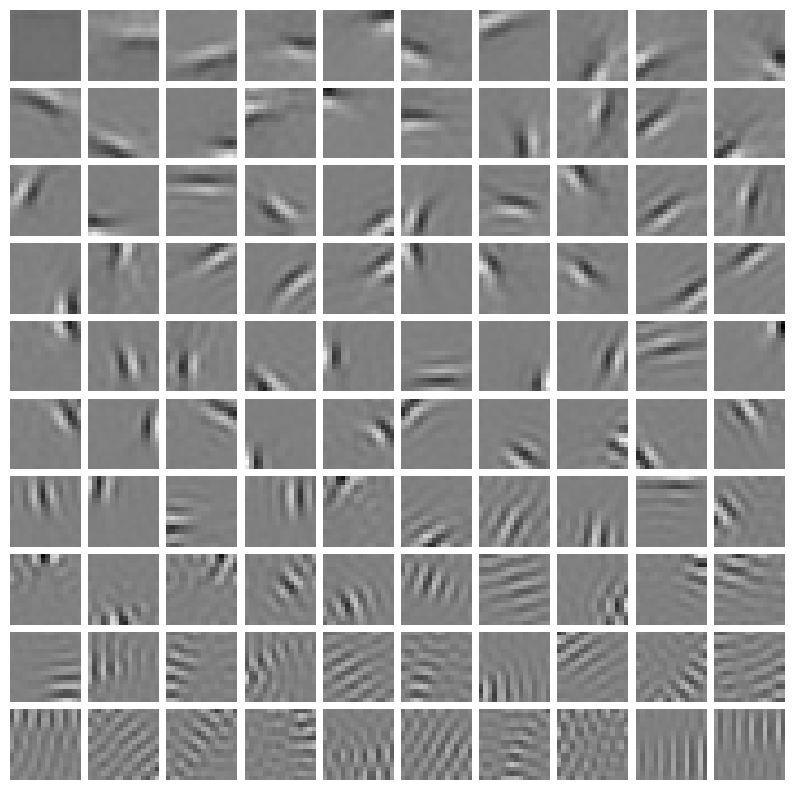

Computing epoch ELBO


400it [00:20, 19.39it/s]


Optimizing ELBO
Epoch    9 	 Batch    0 	 Scale: 1.00 	 ELBO: 106.974899
Epoch    9 	 Batch    1 	 Scale: 1.00 	 ELBO: 105.585358
Epoch    9 	 Batch    2 	 Scale: 1.00 	 ELBO: 115.590668
Epoch    9 	 Batch    3 	 Scale: 1.00 	 ELBO: 109.425110
Epoch    9 	 Batch    4 	 Scale: 1.00 	 ELBO: 105.018860
Epoch    9 	 Batch    5 	 Scale: 1.00 	 ELBO: 107.272888
Epoch    9 	 Batch    6 	 Scale: 1.00 	 ELBO: 96.171112
Epoch    9 	 Batch    7 	 Scale: 1.00 	 ELBO: 106.146965
Epoch    9 	 Batch    8 	 Scale: 1.00 	 ELBO: 102.640488
Epoch    9 	 Batch    9 	 Scale: 1.00 	 ELBO: 105.905014
Epoch    9 	 Batch   10 	 Scale: 1.00 	 ELBO: 101.746246
Epoch    9 	 Batch   11 	 Scale: 1.00 	 ELBO: 99.135246
Epoch    9 	 Batch   12 	 Scale: 1.00 	 ELBO: 105.057892
Epoch    9 	 Batch   13 	 Scale: 1.00 	 ELBO: 103.962112
Epoch    9 	 Batch   14 	 Scale: 1.00 	 ELBO: 95.067970
Epoch    9 	 Batch   15 	 Scale: 1.00 	 ELBO: 109.684380
Epoch    9 	 Batch   16 	 Scale: 1.00 	 ELBO: 115.470032
Epoch    9 	 Batch

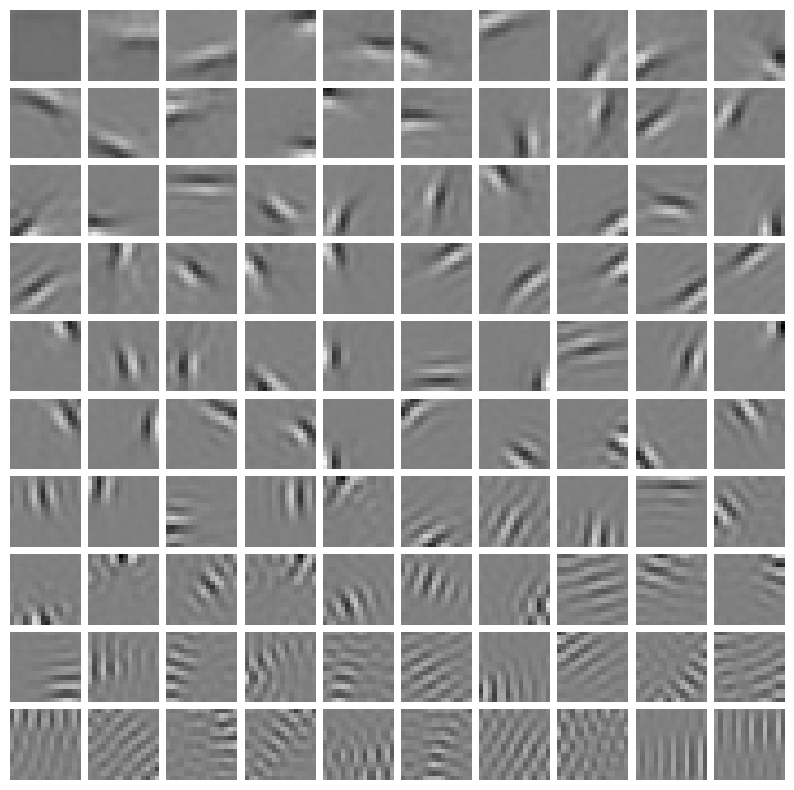

Computing epoch ELBO


400it [00:18, 21.42it/s]


Optimizing ELBO
Epoch   10 	 Batch    0 	 Scale: 1.00 	 ELBO: 107.182388
Epoch   10 	 Batch    1 	 Scale: 1.00 	 ELBO: 105.809387
Epoch   10 	 Batch    2 	 Scale: 1.00 	 ELBO: 115.835632
Epoch   10 	 Batch    3 	 Scale: 1.00 	 ELBO: 109.635666
Epoch   10 	 Batch    4 	 Scale: 1.00 	 ELBO: 105.206482
Epoch   10 	 Batch    5 	 Scale: 1.00 	 ELBO: 107.477074
Epoch   10 	 Batch    6 	 Scale: 1.00 	 ELBO: 96.408012
Epoch   10 	 Batch    7 	 Scale: 1.00 	 ELBO: 106.401886
Epoch   10 	 Batch    8 	 Scale: 1.00 	 ELBO: 102.827919
Epoch   10 	 Batch    9 	 Scale: 1.00 	 ELBO: 106.104813
Epoch   10 	 Batch   10 	 Scale: 1.00 	 ELBO: 102.002563
Epoch   10 	 Batch   11 	 Scale: 1.00 	 ELBO: 99.357529
Epoch   10 	 Batch   12 	 Scale: 1.00 	 ELBO: 105.237663
Epoch   10 	 Batch   13 	 Scale: 1.00 	 ELBO: 104.162369
Epoch   10 	 Batch   14 	 Scale: 1.00 	 ELBO: 95.271416
Epoch   10 	 Batch   15 	 Scale: 1.00 	 ELBO: 109.907043
Epoch   10 	 Batch   16 	 Scale: 1.00 	 ELBO: 115.696777
Epoch   10 	 Batch

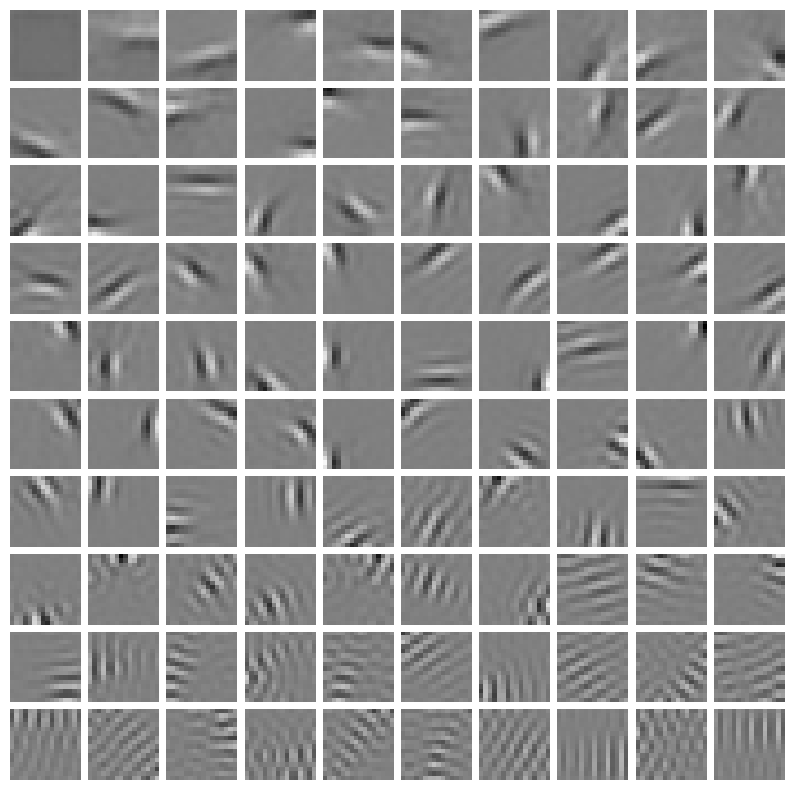

Computing epoch ELBO


400it [00:18, 21.59it/s]


In [2]:
### Training

def plot_training_progress(model, epoch, elbos=None):
    alphas = compute_alpha(model, dataset)
    plu.plot(elbos, filename=prefix+"elbos.pdf")
    plu.plot_W(model, filename=prefix + "Ws-{}.png".format(epoch), order=alphas)
    plu.plot_samples(model, test_x[:10], test_indexes[:10], filename=prefix + "samples-{}.pdf".format(epoch))
    plu.plot_W(model, order=alphas)
    plt.show()
    
model.normalize_W()

plot_training_progress(model, 0)

epoch_elbos = []
epoch_likelihood_entropies = []
epoch_prior_entropies = []
epoch_proposal_entropies = []
epoch_gini = []

def on_after_epoch(model, epoch, elbos=None):
    elbos = -np.array(likelihood_entropies)-np.array(prior_entropies)+np.array(proposal_entropies)
    plot_training_progress(model, epoch, elbos)
    epoch_gini.append(posterior_sparseness(model, test_x, test_indexes))

    # Compute ELBO for this epoch
    print("Computing epoch ELBO")
    batch_likelihood_entropies = []
    batch_prior_entropies = []
    batch_proposal_entropies = []
    
    def collect_elbo(likelihood_entropy, prior_entropy, proposal_entropy):
        batch_likelihood_entropies.append(likelihood_entropy.item())
        batch_prior_entropies.append(prior_entropy.item())
        batch_proposal_entropies.append(proposal_entropy.item())

    oce = model.on_compute_entropy
    model.on_compute_entropy = collect_elbo
    for batch_idx, (data, indexes) in tqdm(enumerate(dataloader)):
        data = data.type(torch.get_default_dtype()).to(model.device)
        if isinstance(model.variationalparams, AmortizedVariationalParams):
            elbo = model(data, indexes)
        else:
            elbo = optimize_latents(model, data, indexes, init=True, max_iter=100)
    model.on_compute_entropy = oce

    batch_likelihood_entropies = np.array(batch_likelihood_entropies)
    batch_prior_entropies = np.array(batch_prior_entropies)
    batch_proposal_entropies = np.array(batch_proposal_entropies)

    batch_elbos = -batch_likelihood_entropies -batch_prior_entropies +batch_proposal_entropies
    epoch_elbos.append(np.ma.masked_invalid(np.array(batch_elbos)).mean())
    plu.plot(batch_elbos, prefix+"batch-elbos-{}.pdf".format(epoch))
    plu.plot(epoch_elbos, prefix+"epoch-elbos.pdf")

    epoch_likelihood_entropies.append(np.ma.masked_invalid(np.array(batch_likelihood_entropies)).mean())
    epoch_prior_entropies.append(np.ma.masked_invalid(np.array(batch_prior_entropies)).mean())
    epoch_proposal_entropies.append(np.ma.masked_invalid(np.array(batch_proposal_entropies)).mean())
    plu.plot(epoch_likelihood_entropies, filename=prefix + "epoch_likelihood_entropies.pdf")
    plu.plot(epoch_prior_entropies, filename=prefix + "epoch_prior_entropies.pdf")
    plu.plot(epoch_proposal_entropies, filename=prefix + "epoch_proposal_entropies.pdf")
    plu.plot_errorbar(epoch_gini, filename=prefix + "epoch_gini.pdf")
    
if isinstance(model.variationalparams, AmortizedVariationalParams):
    # Gradient-based optimization
    epoch = 0
    model.prior_scale = 1
    nepochs = 200

    if isinstance(model, (OptimalManifoldSC, AnalyticELBOSC)):
        def set_annealing(model, epoch, *args, **kwds):
            model.prior_scale = max(1.0, 2-0.1*epoch)

        elbos, gradsizes, gradtotalvars = train_Adam(model, dataloader, lr=1e-3, 
                                                        nepochs=nepochs, 
                                                        on_epoch_finish=CallbackList((on_after_epoch, 
                                                        # set_annealing
                                                        )))
        plu.plot(gradsizes, prefix + "gradsizes.pdf")
        plu.plot_entropies(likelihood_entropies, 
                        prior_entropies, 
                        proposal_entropies, 
                        prefix + "entropies.pdf")
        
    elif isinstance(model, (StochasticSC, LinearGaussianModel)):
        elbos, gradmeansizes, gradtotalvars = train_Adam(model, dataloader, lr=1e-3, 
                                                            nepochs=nepochs, 
                                                            on_epoch_finish=plot_training_progress)
        plu.plot(gradmeansizes, prefix + "gradmeansizes.pdf")
        plu.plot(gradtotalvars, prefix + "gradtotalvars.pdf")
    
else:
    # EM-like optimization
    for epoch in range(10):
        print("Optimizing ELBO")
        for batch_idx, (data, indexes) in enumerate(dataloader):
            model.prior_scale = max(1.0, 2*(5-epoch))  # prior annealing
            #model.likelihood_scale = ([-(1/(x-7)) for x in range(6)] + [1.0]*4)[epoch]  # beta-VAE
            data = data.type(torch.get_default_dtype()).to(model.device)
            elbo = optimize_latents(model, data, indexes, max_iter=100)
            elbo = adjust_parameters(model, data, indexes, lr=0.5)
            if not model.constrain_W:
                model.normalize_W()
            print("Epoch {:4d} \t Batch {:4d} \t Scale: {:.2f} \t ELBO: {:.6f}".format(epoch+1, batch_idx, model.prior_scale, elbo))
        on_after_epoch(model, epoch+1)